# 5. [20 points] The Ising Model in 2D

**LI, YI-QUAN(Eric)** and **Jenish**

**uni-ID:s08yli** and **s6jeadhi**

**github-address: https://github.com/LeeYee2002/Computational-Physics-HW.git**

Let the external magnetic field h = 0. The model is essentially indistinguishable from before:

\begin{align}
    Z[\beta,J] &= \sum_{\sigma} e^{-\beta H[J]}
    &
    H[J] &= -J\sum_{<\vec{x},\vec{y}>} \sigma_{\vec{x}} \sigma_{\vec{y}}
    &
    \beta = & \frac{1}{T}
\end{align}

To pick a set of dimensionless units we can set β = 1.
The transition happens at the critical coupling:


\begin{align}
    J_c = & \frac{1}{2} \log{(1 + \sqrt{2})} \approx 0.4406867935097715···
\end{align}

### 5.1 [3pts]ExactResults

The net magnetization $M=\sum_{\vec{x}} \sigma_{\vec{x}}$, and the magnetization per site is m = $\frac{1}{N^2} M$ M. In 1948On sager twice stated at conferences without proof that in the thermodynamic limit:

\begin{equation}
    \langle |m| \rangle = \begin{cases}
    0, & J   \leq J_c & \text{(warmer than critical)}\\
    (1 - \frac{1}{\sinh^4{(2J)}})^{\frac{1}{8}}, & J >  J_c & \text{(cooler than critial)}.
  \end{cases}
 
\end{equation}

We also know the energy per site:

\begin{align}

    \epsilon = -J \coth(2J) \{1+\frac{2}{\pi}(2\tanh^2(2J)−1)× K(4 \operatorname{sech} ^2(2J)\tanh^2(2J))\}
    
\end{align}

where K is the complete elliptic integral of the first kind,

\begin{align}

K(k^2) = \int^\frac{\pi}{2}_0 \frac{d\theta}{\sqrt{1-k^2 \sin^2{\theta}}}

\end{align}

**Implement the exactly-known⟨|m|⟩ and ϵ. Don’t implement the elliptic K yourself unless you imagine enjoying it.As away to check your implementation,here is a small table of some selected value.** 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

global J_c 
J_c = 0.5*np.log(1+ 2**0.5) #J_c = 0.4406867935097715···

In [57]:
#expectation of |m|
def average_m(J):
    return_J = np.empty_like(J)
    for i in range(J.size):
        if J[i] > J_c:
            return_J[i]=(1- 1/(np.sinh(2*J[i])**4))**0.125
    else:
        return_J[i] = 0
    return return_J
#epsilon 
def eps(J):
    epsilon = -J/np.tanh(2*J)*( 1 + (2/np.pi)*( 2* np.tanh(2*J)**2-1 ) * K(4*np.cosh(2*J)**-2 * np.tanh(2*J)**2) )
    return epsilon
#K integral
def K(k_square):
    #print(type(k_square))
    if isinstance(k_square ,np.ndarray) or isinstance(k_square, list):
        k_square_element = []
        for member in k_square:
            integrand = lambda x : 1/np.sqrt(1-member*np.sin(x)**2)
            a = 0.
            b = np.pi/2
            result, error = spi.quad(integrand, a, b)
            #print('Result is ', result, 'with error ', error)
            k_square_element.append(result)
        return np.array(k_square_element)
    else:
        integrand = lambda x : 1/np.sqrt(1-k_square*np.sin(x)**2)
        a = 0.
        b = np.pi/2
        result, error = spi.quad(integrand, a, b)
        return result


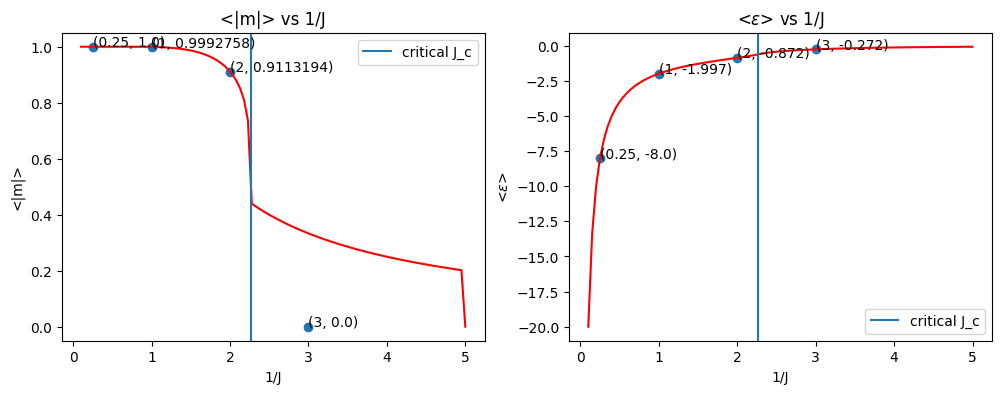

In [58]:
#known value (1/J, <|m|>,<epsilon>)
inverse_J = [0.25, 1, 2, 3]
known_m = [1.0000000, 0.9992758, 0.9113194,0.0]
known_eps = [-8.000, -1.997, -0.872, -0.272]
#plot the calculation value:
one_over_J = np.linspace(0.1,5,100) #1/J
#print(one_over_J)
real_J = 1/one_over_J #J
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True,figsize=(12, 4))
#print(average_m(real_J))
ax1.set_title('<|m|> vs 1/J')
ax1.plot(one_over_J,average_m(real_J),color='r')
ax1.scatter(inverse_J, known_m)
ax1.set_xlabel("1/J")
ax1.set_ylabel("<|m|>")
ax1.axvline(1/J_c,label = 'critical J_c')
for i, j in zip(inverse_J, known_m):
   ax1.text(i, j, '({}, {})'.format(i, j))
ax1.legend()

ax2.set_title(r'<$\epsilon$> vs 1/J')
ax2.plot(one_over_J,eps(real_J),color='r')
ax2.scatter(inverse_J, known_eps)
ax2.set_xlabel("1/J")
ax2.set_ylabel(r"<$\epsilon$>")
ax2.axvline(1/J_c,label = 'critical J_c')
for i, j in zip(inverse_J, known_eps):
   ax2.text(i, j, '({}, {})'.format(i, j))
ax2.legend()


plt.show()
 


By using 100 points to plot two observables, we find the function, $\langle |m|\rangle$, for $J = J_c$ we will see an unsmooth curve. The plot which is distort or unperfect, because of the defect of py-plot. It should perform like a step-function.

### 5.2 [6points] MCMC for the 2D Ising Model

**(1 point) Implement a function which, given $J$ and a configuration of spins $\sigma$ on the 2D square lattice with periodic boundary conditions, computes $H$**.

In [59]:
#Now we construct MCMC 2-D, boundary condition shows that we will connect our samples(head and tail) together at each row and column
#However 2-D model can be disassemble by multiple 1-D

#1D=H conputation
def compute_H_1d(J,sigma_1d):
    h_1d = sigma_1d[0]*sigma_1d[-1]
    for i in range(sigma_1d.shape[0]-1):
        h_1d += sigma_1d[i]*sigma_1d[i+1]
    h_1d *=- J
    return h_1d
#we suppose sigma is n*m(here N*N) 2D plane
def compute_H_2d(J,sigma_2d):
    h_2d = 0
    row_num, col_num = sigma_2d.shape
    for i in range(row_num):
        h_2d += compute_H_1d(J, sigma_2d[i])
    for j in range(col_num):
        h_2d += compute_H_1d(J,sigma_2d[:,j])
    return h_2d

We can verify with simple case:

In [60]:
a = np.ones((3,2))
print(a)
print(compute_H_2d(1,a))


[[1. 1.]
 [1. 1.]
 [1. 1.]]
-12.0


**(1 point) Implement a function which, given $J$, a configuration $\sigma $, and a location $\vec{x}$, computes**

\begin{align}
    \Delta H = H(\sigma \text{ except flip the spin on site } \vec{x}) - H(\sigma)

\end{align}

**Make sure this function is fast; if it scales with the volume, the computations will take a very long time.**


For the givern point $\vec{x_k}$, if we flip such $\vec{x_k}$, the products around $\vec{x_k}$ will be change by negative sign. Suppose such $x_k = (x_i,y_j)$, the products of surrounding:

\begin{align}
\sigma(x_i,y_j)*(\sigma(x_{i+1},y_j)+\sigma(x_{i-1},y_j)+\sigma(x_i,y_{j+1})+\sigma(x_i,y_{j-1}))
\end{align}

The rest part of the lattice, is unchanged, once we flip point, the product of surrounding:

\begin{align}
-\sigma(x_i,y_j)*(\sigma(x_{i+1},y_j)+\sigma(x_{i-1},y_j)+\sigma(x_i,y_{j+1})+\sigma(x_i,y_{j-1}))
\end{align}

Thus,the $\Delta H$ should be:
\begin{align}
\Delta H &=& J* 2*\sigma(x_i,y_j)*(\sigma(x_{i+1},y_j)+\sigma(x_{i-1},y_j)+\sigma(x_i,y_{j+1})+\sigma(x_i,y_{j-1}))
\end{align}

The difference only has to do with surrounding 4 spin of the flip point. So we can write the code:

In [61]:
#delta H : input(J,sigma,point(tuple))
def delta_H(J,sigma,point):
    x,y = point
    row_num, col_num = sigma.shape
    d_H = 0
    d_H = 2*J*sigma[x,y]*( sigma[(x+1) % row_num,y] +sigma[(x-1)% row_num ,y] + sigma[x,(y+1) % col_num] + sigma[x,(y-1) % col_num] )
    return d_H

In [62]:
#We do a simple experiment to verify our statement:
a = np.ones((3,3))
print("a shape:\n",a)
b = np.ones_like(a)
b[0,0] = -1
print("b shape:\n",b)
print('H(b):',compute_H_2d(1,b))
print('H(a):',compute_H_2d(1,a))
print('H(b)-H(a)=',compute_H_2d(1,b)-compute_H_2d(J=1,sigma_2d=a))

print('By delta H formula:')

print("delta H:", delta_H(1,a,(0,0)))

a shape:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
b shape:
 [[-1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
H(b): -10.0
H(a): -18.0
H(b)-H(a)= 8.0
By delta H formula:
delta H: 8.0


**(1 point) Implement the Metropolis-Hastings for sampling from the 2D Ising model, using sweeps of single spin flips.**

In [63]:
#define M and m
def compute_M_m(sigma_2d):
    row_num, col_num = sigma_2d.shape
    M, m = 0., 0.
    for i in range(row_num):
        for j in range(col_num):
            M += sigma_2d[i][j]
    m = M/(row_num*col_num)
    return M, m
#create a sweep design. Initially, we use i,j loop, such Cartasin product is in order. Now we shuffle each i,j, to make a new Cartasian product space
def sweep_2d(row, col):
    import random
    #then we wrap our product space with tuple (i,j)
    sweep_list = []
    sweep_order_i = np.arange(0,row) 
    np.random.shuffle(sweep_order_i) # shuffle it
    sweep_order_j = np.arange(0,col)
    np.random.shuffle(sweep_order_j) #shuffle it
    for i in sweep_order_i:
        for j in sweep_order_j:
            sweep_list.append((i,j))
    random.shuffle(sweep_list)
    return sweep_list

In [64]:
print(sweep_2d(18,19))
print(sweep_2d(2,2)[2])
a=np.ones((2,2))
print(a[sweep_2d(2,2)[2]])

[(np.int64(7), np.int64(12)), (np.int64(5), np.int64(0)), (np.int64(0), np.int64(3)), (np.int64(12), np.int64(1)), (np.int64(14), np.int64(0)), (np.int64(5), np.int64(1)), (np.int64(7), np.int64(9)), (np.int64(7), np.int64(13)), (np.int64(9), np.int64(18)), (np.int64(17), np.int64(16)), (np.int64(17), np.int64(11)), (np.int64(12), np.int64(9)), (np.int64(15), np.int64(18)), (np.int64(2), np.int64(2)), (np.int64(7), np.int64(8)), (np.int64(9), np.int64(14)), (np.int64(9), np.int64(13)), (np.int64(13), np.int64(5)), (np.int64(5), np.int64(18)), (np.int64(8), np.int64(5)), (np.int64(9), np.int64(9)), (np.int64(16), np.int64(6)), (np.int64(2), np.int64(13)), (np.int64(11), np.int64(3)), (np.int64(11), np.int64(9)), (np.int64(5), np.int64(15)), (np.int64(4), np.int64(9)), (np.int64(14), np.int64(8)), (np.int64(10), np.int64(3)), (np.int64(10), np.int64(8)), (np.int64(4), np.int64(0)), (np.int64(15), np.int64(0)), (np.int64(4), np.int64(11)), (np.int64(9), np.int64(16)), (np.int64(11), np.in

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


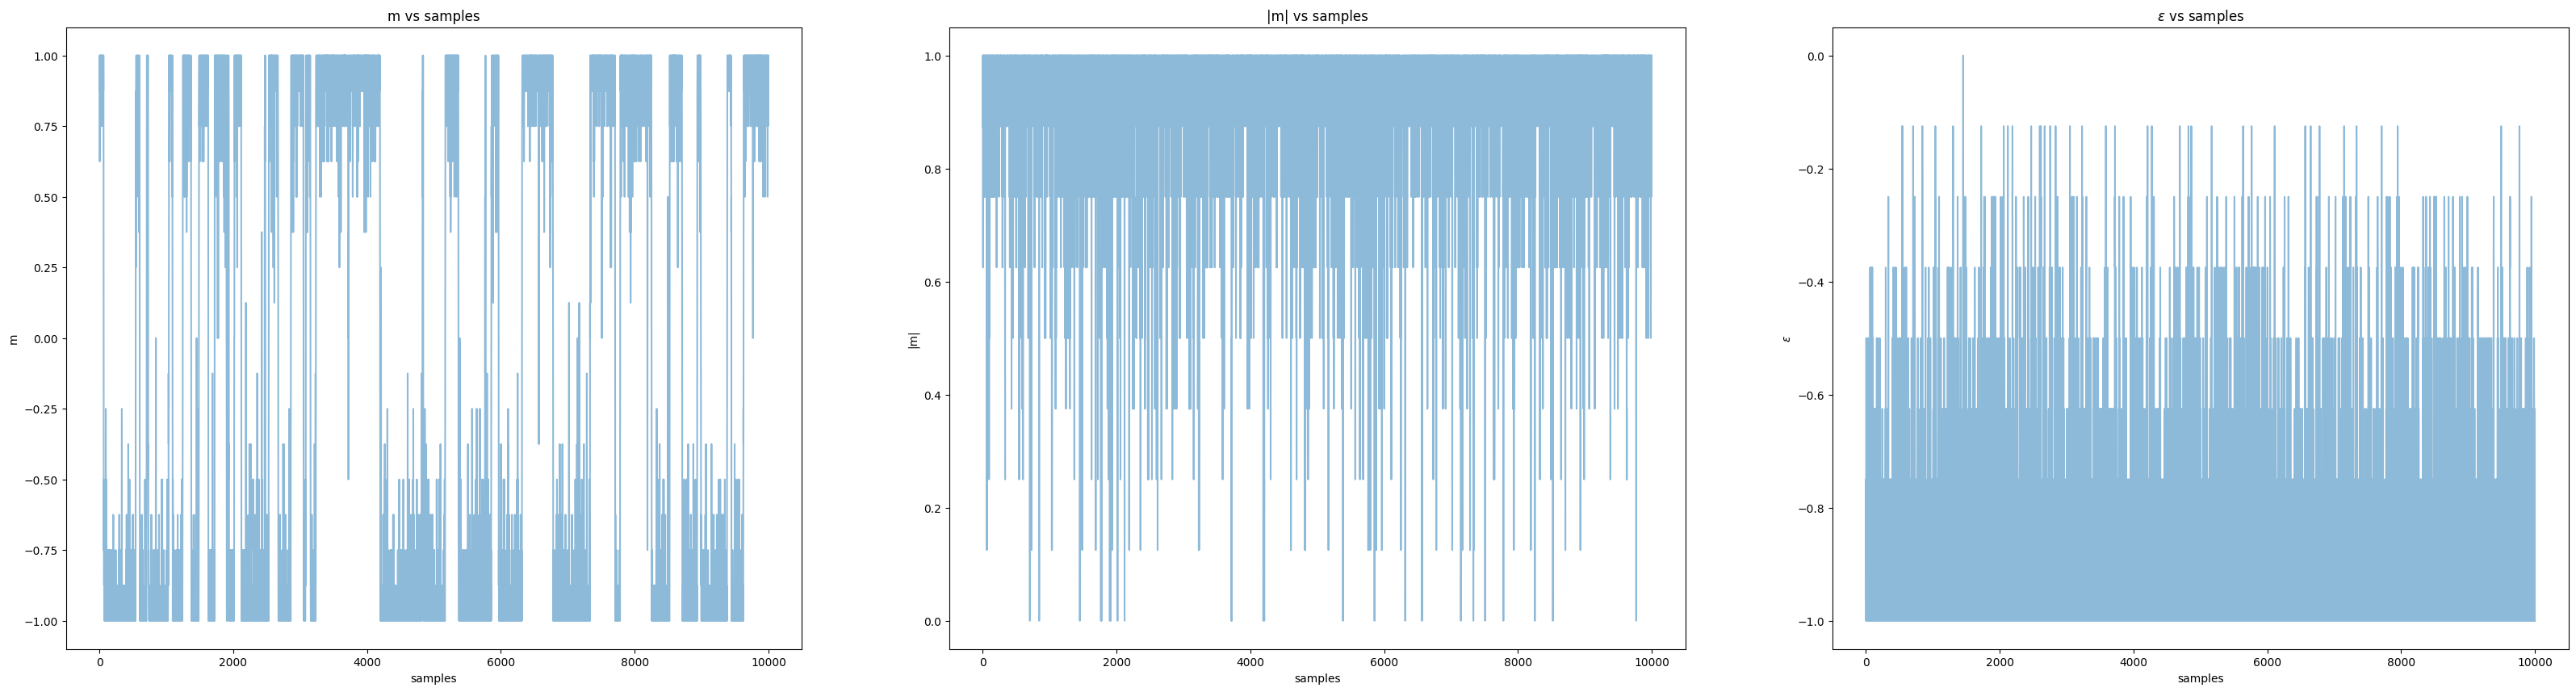

In [65]:
## MCMC 2D Ising Model 
N = 4   #size of sample(N^2)
J = 0.5 #the coupling of J
external_h = 0 #from the premise of the exercise this time.
lattice_2d = np.ones((N,N)) #N*N matrix
#lattice_2d = np.random.choice([1, -1], size=(N, N))
print(lattice_2d)
samples = 10000 #from the next proble

#net_magnetisation = []     # M
average_magnetisation = [] # m
energy_per_site = []

for config in range(samples): #we run our revolution samples times
    sweep_target_list=sweep_2d(N,N) #create sweeping space, every time we have differnt stochastic sweeping
    for i,j in sweep_target_list:
        #print(lattice_2d)
        update_probability = np.random.uniform(0,1)
        acception_chance = np.e**(-1*delta_H(J,lattice_2d,(i,j)))
        if update_probability < acception_chance:
            lattice_2d[i,j] *= -1
    M_this_run, m_this_run =compute_M_m(lattice_2d)
    #net_magnetisation.append(M_this_run)
    average_magnetisation.append(m_this_run)
    energy_per_site.append(compute_H_2d(J,lattice_2d)/N**2)

fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(40,10))#ax1 for m, ax2 for |m|, ax3 for epsilon

ax1.set_title('m vs samples')
ax1.plot(average_magnetisation,alpha=0.5)
#ax1.set_xticks(np.arange(0, 10**4, step=1000))
ax1.set_xlabel("samples")
ax1.set_ylabel("m")

ax2.set_title('|m| vs samples')
ax2.plot(np.abs(average_magnetisation),alpha=0.5)
ax2.set_xlabel("samples")
ax2.set_ylabel("|m|")

ax3.set_title(r'$\epsilon$ vs samples')
ax3.plot(energy_per_site,alpha=0.5)
ax3.set_xlabel("samples")
ax3.set_ylabel(r"$\epsilon$")

plt.show()

**(2 points) Generate a single ensemble of $ 10^5 $ configurations for $ J = 0.5 $ for each $ N = \{ 4, 8, 12 \} $. On three separate plots, show the Monte Carlo histories of $ m $, $ |m| $, and $ \epsilon $ (measure one each configuration and plot as a function of Monte Carlo time) (you can put the 3 $ N $'s on the same figure). You’ll reuse these configurations below.**


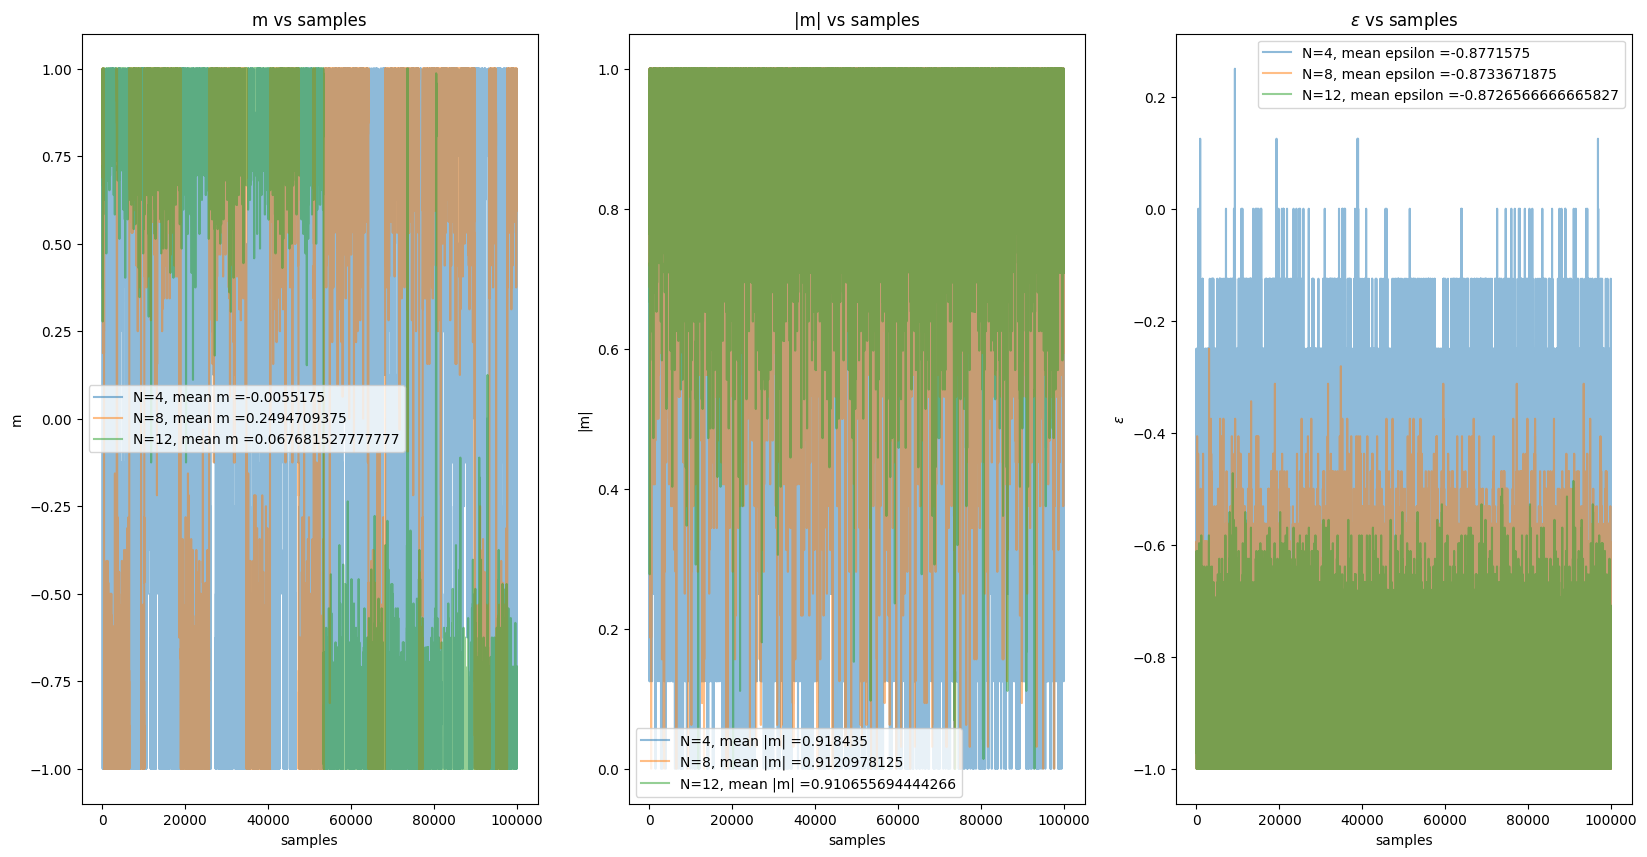

In [66]:
#Monte Carlo 2-D


J = 0.5
N = [4,8,12]
external_h = 0 #from the premise of the exercise this time.
samples = 10**5
average_magnetisation = [[],[],[]] # m: 4,8,12
energy_per_site = [[],[],[]]       #epsilon: 4,8,12

experiment_count = 0 #0:N=4, 1:N=8, 2:N=12
for lattice_grid in N:
    lattice_2d = np.ones((lattice_grid,lattice_grid)) #all up initial codition
    for config in range(samples): #we run our revolution samples times
        sweep_target_list = sweep_2d(lattice_grid,lattice_grid) #create sweeping space, every time we have differnt stochastic sweeping
        for i,j in sweep_target_list:
            update_probability = np.random.uniform(0,1)
            acception_chance = np.e**(-1*delta_H(J,lattice_2d,(i,j)))
            if update_probability < acception_chance:
                lattice_2d[i,j] *= -1
        M_this_run, m_this_run = compute_M_m(lattice_2d)
        #net_magnetisation.append(M_this_run)
        average_magnetisation[experiment_count].append(m_this_run)
        energy_per_site[experiment_count].append(compute_H_2d(J,lattice_2d)/lattice_grid**2)
    experiment_count+=1 #go to next N

fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(20,10))#ax1 for m, ax2 for |m|, ax3 for epsilon

ax1.set_title('m vs samples')
ax1.plot(average_magnetisation[0],alpha=0.5,label=f'N=4, mean m ={sum(average_magnetisation[0])/10**5}')
ax1.plot(average_magnetisation[1],alpha=0.5,label=f"N=8, mean m ={sum(average_magnetisation[1])/10**5}")
ax1.plot(average_magnetisation[2],alpha=0.5,label=f"N=12, mean m ={sum(average_magnetisation[2])/10**5}")
#ax1.set_xticks(np.arange(0, 10**4, step=1000))
ax1.set_xlabel("samples")
ax1.set_ylabel("m")
ax1.legend()

ax2.set_title('|m| vs samples')
ax2.plot(np.abs(average_magnetisation[0]),alpha=0.5,label=f'N=4, mean |m| ={sum(np.abs(average_magnetisation[0]))/10**5}')
ax2.plot(np.abs(average_magnetisation[1]),alpha=0.5,label=f'N=8, mean |m| ={sum(np.abs(average_magnetisation[1]))/10**5}')
ax2.plot(np.abs(average_magnetisation[2]),alpha=0.5,label=f'N=12, mean |m| ={sum(np.abs(average_magnetisation[2]))/10**5}')
ax2.set_xlabel("samples")
ax2.set_ylabel("|m|")
ax2.legend()

ax3.set_title(r'$\epsilon$ vs samples')
ax3.plot(energy_per_site[0],alpha=0.5,label=f"N=4, mean epsilon ={sum(energy_per_site[0])/10**5}")
ax3.plot(energy_per_site[1],alpha=0.5,label=f"N=8, mean epsilon ={sum(energy_per_site[1])/10**5}")
ax3.plot(energy_per_site[2],alpha=0.5,label=f"N=12, mean epsilon ={sum(energy_per_site[2])/10**5}")
ax3.set_xlabel("samples")
ax3.set_ylabel(r"$\epsilon$")
ax3.legend()

plt.show()


**(1 point) Remember that $ J = 0.5 > J_c \approx 0.44 $, we are in the broken phase. How does that relate to what you see in the Monte Carlo histories? Keep in mind we proved in class that $ \langle m \rangle = 0 $ for any finite $ N $. Does that jibe with what you see?**

We as our system's size grows, the fluctuation for the change of $\langle| m| \rangle $ and $\langle \epsilon \rangle$ are tend to stablize. Although the expectation value is still the same for the different system size. The frequency of periodic transition of the $\langle m\rangle$ also decreases. It shows that as our system approach to infinite size, there exists magnetisation. The 2d model shows more higher correlated for each spin-spin within whole system, that why it is contradicted with the math prove.

### 5.3 [3 points] Slow Tunneling Means Long Autocorrelation Times


\begin{align*}
C(\Delta t) &= \langle (O(t) - \mu)(O(t + \Delta t) - \mu) \rangle \\
\Gamma(\Delta t) &= \frac{C(\Delta t)}{C(0)} \\
C(\Delta t) &= \frac{1}{n - |\Delta t|} \sum_{t_0 = 0}^{n - |\Delta t|-1} (O(t_0) - \mu)(O(t_0 + \Delta t) - \mu)
\end{align*}


*integrated autocorrelation time*:

\begin{align}

\tau = \frac{1}{2} + \sum_{\Delta t = 1}^{T} \Gamma(\Delta t)

\end{align}

**(2 points) Compute the autocorrelation time $\tau$ for $m$, $|m|$, and $\epsilon$ for the two test ensembles above. Do the results comport with the Monte Carlo history figure you made?**

In [67]:
#autocorrelation function C
import numpy as np
def autocorrelation(timeseries, mean=None):
    if mean is None:
        mean = timeseries.mean()
        #print(mean)
        fluctuations = timeseries-mean
        C = np.fft.ifft(np.fft.fft(fluctuations) * np.fft.ifft(fluctuations)).real
    return C/C[0]
#integrated value: tau
def integrated_autocorrelation_time(timeseries,mean=None):
    #if any(autocorrelation(timeseries)<0):
    #    print("there is 0")
    Gamma = autocorrelation(timeseries)
    first_zero = np.where(Gamma <= 0)[0][0] #T should be choosen to first zero
    #print(first_zero)
    tau = 0.5 +  Gamma[1:first_zero].sum()
    #print(tau)
    return tau

Text(0.5, 1.0, 'Integrated autocorrelation time for different observable in different case')

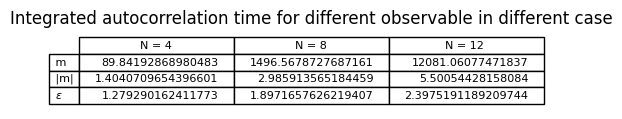

In [68]:
data_for_table = [
                    [integrated_autocorrelation_time(np.array(average_magnetisation[0])), #N=4 m
                   integrated_autocorrelation_time(np.array(average_magnetisation[1])),   #N=8 m
                     integrated_autocorrelation_time(np.array(average_magnetisation[2]))  #N=12 m
                     ] 
                  ,[integrated_autocorrelation_time(np.abs(average_magnetisation[0])), #N=4 |m|
                    integrated_autocorrelation_time(np.abs(average_magnetisation[1])), #N=8 |m|
                    integrated_autocorrelation_time(np.abs(average_magnetisation[2]))
                    ] #N=12|m|
                    ,[integrated_autocorrelation_time(np.array(energy_per_site[0])),
                      integrated_autocorrelation_time(np.array(energy_per_site[1])),
                      integrated_autocorrelation_time(np.array(energy_per_site[2]))
                      ]
                ]
#print(data_for_table)

fig, ax = plt.subplots(figsize = (6,1))
# Hide the axes
ax.axis('off')
col_txt = ('N = 4', 'N = 8', 'N = 12 ')
row_txt = (" m ", " |m| ", r' $\epsilon$ ')
this_table = plt.table(cellText=data_for_table,rowLabels=row_txt,colLabels=col_txt,loc='center')
plt.title('Integrated autocorrelation time for different observable in different case')




We found out that our datas fluctuate very fast(except $\langle m \rangle$). Which accord with our figure history above; expecially for m, we can see its more prolonged period as we expend the lattice size.

**(1 point) Recall that when $h = 0$ we have an extra $\mathbb{Z}_2$ symmetry: $\sigma$ and $-\sigma$ have the same weight, and this guarantees that $\langle m \rangle = 0$ for any finite $N$. Write 1 or 2 sentences explaining why the very slow autocorrelation time of m is not important.**


Near the cirital temperature, it is not matter how is our autocorrelation, because what really import is the fact that our system is fluctuating at $\langle m\rangle $ = 0. 

### 5.4 [8 points] The Thermodynamic Limit for One J

You now have an ensemble of $10^5$ measurements for $J = 0.5$ for each $N = \{4, 8, 12\}$. For each ensemble, use as `the' autocorrelation time the larger of the autocorrelation times of $|m|$ and $\epsilon$.


**(5 points) Perform a bootstrap analysis estimating the mean and uncertainty for ⟨|m|⟩ and ⟨ϵ⟩ for each ensemble. To ensure you don’t under-estimate your uncertainties (by thermalizing and blocking ordecimating, for example).**

In [83]:
#Now we have N=4, N=8, N=12 datas
#each have |m| and epsilon
data_for_bootstrap = [
                    [np.abs(average_magnetisation[0]), #N=4 |m|
                    np.abs(average_magnetisation[1]), #N=8 |m|
                    np.abs(average_magnetisation[2]) #N=12|m|
                    ] 
                    ,[np.array(energy_per_site[0]),  #N=4 e
                      np.array(energy_per_site[1]),  #N=8 e
                      np.array(energy_per_site[2])  #N=12 e
                      ]
                    ]
#decide the size of our bootstrap vector: 1. draw A=1000 times 2. repeat B=100 times
#firstly, we thermalize our data: we only keep those over the autocorrelation time tau
#secondly, we randomly decide we want to decimating drawing or blocking drawing

def bootstrap(A = 50, B= 100, raw_samples=np.array(500), theralmal_step=10):
  list_A = [] #1d size 50 list, store the random picking data
  list_B = [] #1d size 100 list, store the expectation valuce from each A, we do 100 times
  #decimating or blocking?
  for i in range(B):
    list_A = []
    #thermalize
    cooked_sample = raw_samples[theralmal_step:] #we cut off all data that not cooked enough
    np.random.shuffle(cooked_sample)#not only cooked but also more stochastic
    
    coin = np.random.choice([True,False])#true for decimating, false for blocking
    if coin:#decimating
      decimation_factor = np.random.randint(low=1,high=71) #our size as big 10**5, we draw 1000 data(divided 100s)
      for j in range(A):
        cooked_sample = np.delete(cooked_sample,decimation_factor*(j+1))
      list_A = np.random.choice(cooked_sample,A)
    else:#blocking
      for j in range(A):
        block_size = np.random.randint(low=2,high=71)
        block_2d = np.empty((A,block_size))
        start = 0
        for k in range(A):#insert element block to 1000*n array
          for l in range(block_size):
            block_2d[k][l] = cooked_sample[start]
            start+=1
      for k in range(A):
        list_A.append(block_2d[k].mean())
    
    list_B.append (sum(list_A)/len(list_A))##100 B value
  return list_B
  
        

thermal_step_for_N = [int(data_for_table[0][0])+1, int(data_for_table[0][1])+1,int(data_for_table[0][2])+1]
bootstrap_result = [[],[]]

#data for |m|
bootstrap_result[0].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[0][0],theralmal_step=thermal_step_for_N[0])) #see last chapter
bootstrap_result[0].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[0][1],theralmal_step =thermal_step_for_N[1])) #see last chapter
bootstrap_result[0].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[0][2],theralmal_step =thermal_step_for_N[2]))
#data for e
bootstrap_result[1].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[1][0], theralmal_step=thermal_step_for_N[0])) #see last chapter
bootstrap_result[1].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[1][1],theralmal_step =thermal_step_for_N[1])) #see last chapter
bootstrap_result[1].append(bootstrap(A=50,B=100,raw_samples=data_for_bootstrap[1][2],theralmal_step =thermal_step_for_N[2]))





In [ ]:
#we get our mean and uncertainty
bootstrap_result_mean =[[],[]]
bootstrap_result_std =[[],[]]
for i in range(2): #|m| and e
    for j in range(3): # N = 4,8,12
        bootstrap_result_mean[i].append(np.array(bootstrap_result[i][j]).mean() )
        bootstrap_result_std[i].append(np.array(bootstrap_result[i][j]).std())
print(bootstrap_result_mean)
print(bootstrap_result_std)

[[np.float64(0.9189379537388759), np.float64(0.9130487119966625), np.float64(0.9113021968135062)], [np.float64(-0.8809262501384868), np.float64(-0.8741046907072012), np.float64(-0.8719136871585458)]]
[[np.float64(0.015289989767111645), np.float64(0.011710439324894155), np.float64(0.007569280165228494)], [np.float64(0.019722517229165227), np.float64(0.010958686115083367), np.float64(0.006795395237501521)]]


In [89]:
#output format
N = [4,8,12]
observable = ['<|m|> =' , '<e> =']
for i in range(2):
    for j in range(3):
        mean = bootstrap_result_mean[i][j]
        std  = bootstrap_result_std[i][j]
        print(f"For N ={N[j]}:",observable[i],f'{mean}±{std}')


For N =4: <|m|> = 0.9189379537388759±0.015289989767111645
For N =8: <|m|> = 0.9130487119966625±0.011710439324894155
For N =12: <|m|> = 0.9113021968135062±0.007569280165228494
For N =4: <e> = -0.8809262501384868±0.019722517229165227
For N =8: <e> = -0.8741046907072012±0.010958686115083367
For N =12: <e> = -0.8719136871585458±0.006795395237501521


**(2 points) For both observables, plot the estimates (with uncertainties as error bars) against $\frac{1}{N^2}$ (so the thermodynamic limit is at $0$). Show the known exact results given above at $\frac{1}{N^2} = 0$.**


C:\Users\88697\AppData\Local\Temp\ipykernel_7972\4268311736.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


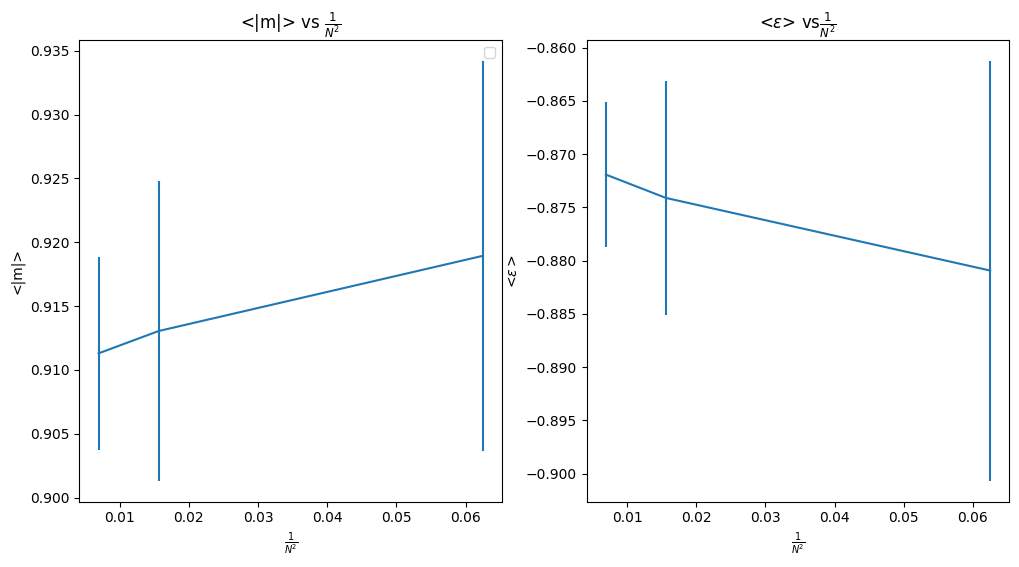

In [95]:
x = [1/4**2, 1/8**2, 1/12**2] #1/N^2
abs_m_mean = bootstrap_result_mean[0]
e_mean = bootstrap_result_mean[1]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.errorbar(x, abs_m_mean, yerr=bootstrap_result_std[0])
ax1.set_title(r"<|m|> vs $\frac{1}{N^2}$")
ax1.set_xlabel(r"$\frac{1}{N^2}$")
ax1.set_ylabel("<|m|>")
ax1.legend()

ax2.errorbar(x, e_mean, yerr=bootstrap_result_std[1])
ax2.set_title(r"<$\epsilon$> vs$\frac{1}{N^2}$")
ax2.set_xlabel(r"$\frac{1}{N^2}$")
ax2.set_ylabel(r"<$\epsilon>$")


plt.show()

Remember we do the first part(5.1), we calculate the analytical solution for $\langle |m|\rangle$ at givern $J$.
The limit for $\frac{1}{N^2} \rightarrow 0$ should approaching the analytical solution.
At $J=0.5$ the solution of $\langle |m|\rangle$ = 0.9113194, $\langle \epsilon \rangle$ = -0.873.



**(1 point) Explain what you see in a few sentences**

We can find out our analytical solution accord with the numerical soulution. As we have large size N. We can see the following figure:

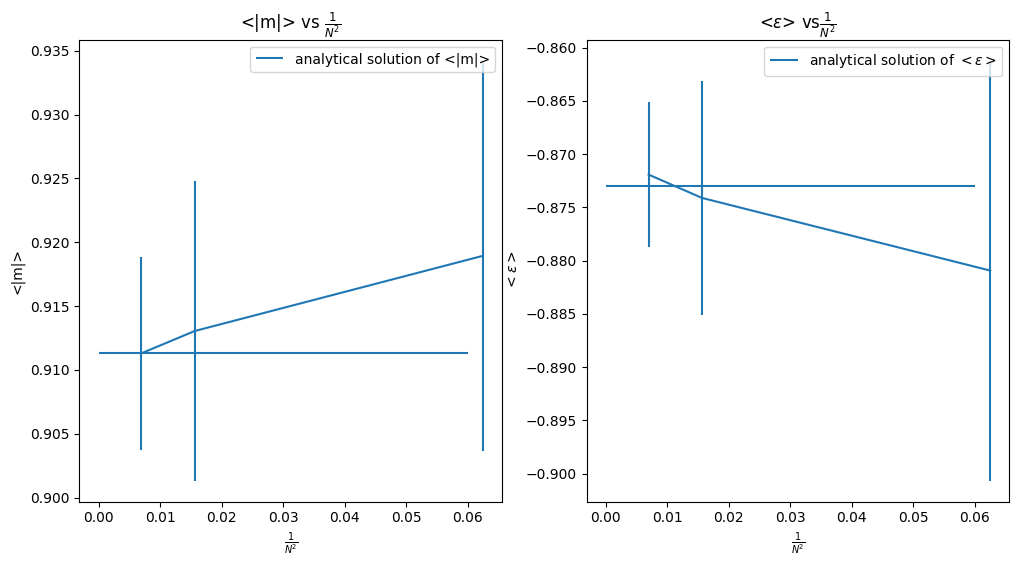

In [99]:
x = [1/4**2, 1/8**2, 1/12**2] #1/N^2
abs_m_mean = bootstrap_result_mean[0]
e_mean = bootstrap_result_mean[1]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.errorbar(x, abs_m_mean, yerr=bootstrap_result_std[0])
ax1.set_title(r"<|m|> vs $\frac{1}{N^2}$")
ax1.set_xlabel(r"$\frac{1}{N^2}$")
ax1.set_ylabel("<|m|>")
ax1.hlines(y = 0.9113194, xmin=0,xmax=0.06,label =r'analytical solution of <|m|>')
ax1.legend()

ax2.errorbar(x, e_mean, yerr=bootstrap_result_std[1])
ax2.set_title(r"<$\epsilon$> vs$\frac{1}{N^2}$")
ax2.set_xlabel(r"$\frac{1}{N^2}$")
ax2.set_ylabel(r"$<\epsilon>$")
ax2.hlines(y = -0.873, xmin=0,xmax=0.06,label =r'analytical solution of $<\epsilon>$')
ax2.legend()


plt.show()

The numerical simulation is aligned with the equation solution, with the uncertainty.